# Tarea 3. Algoritmos Genéticos: Problema de la mochila

## Fundamentos de inteligencia computacional
## por: Juan Pablo Arango A. & Simón Zapata Caro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from random import randint
import pandas as pd

### Problema de optimización:

#### Parámetros:
- $b_j: $ beneficio del j-ésimo artículo
- $\omega_j: $ peso del j-ésimo artículo
- $W_{max}: $ capacidad total de la maleta

#### Variables:
- $x_j: $ decisión de llevar el j-ésimo artículo 

#### Función de fitness:
- max: $F(x_j)= \sum_{j=0}^{N-1}b_j x_j $

#### Sujeta a:
- 1. $\sum_{j=0}^{N-1}\omega_j x_j \leq W_{max}$
- 2. $x_j \in [0,1]   \forall j = 0,1,2, ... N-1$

In [2]:
#set parameters
"""w    = np.array([[ 30,20,22,10,7 ]])
b    = np.array([[100,75,80,40,20]])

Wmax = 60"""

size_ = 10
b = np.random.randint(1,10,size=size_)
b = b.reshape(1,len(b))
w = np.random.randint(1,10,size=size_)
print(np.sum(b))
w = w.reshape(1,len(w))

Wmax = 0.6*np.sum(w)

# set objective function

def F1(x):
    cost = np.sum(x*b,axis=1)
    cost = cost.reshape(len(cost),1)
    
    return cost

def F2(x):
    restr = np.sum(x*w,axis=1)
    restr = restr.reshape(len(restr),1)
    
    return restr

np.sum(b)

52


52

# Algoritmo Genético

In [3]:
population = 20;  #population size
Tm = 0.4;         #mutation rate
Tc = 0.4;         #crossover rate: % of couples selected for crossover
var = b.shape[1]; #optimization problem number of variables
N = 40;          #Number of generations

Generación  1 , valor óptimo =  37
elementos a llevar:  [1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Generación  2 , valor óptimo =  37
elementos a llevar:  [1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Generación  3 , valor óptimo =  37
elementos a llevar:  [1, 0, 1, 1, 1, 1, 1, 0, 0, 0]
Generación  4 , valor óptimo =  38
elementos a llevar:  [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Generación  5 , valor óptimo =  38
elementos a llevar:  [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
Generación  6 , valor óptimo =  38
elementos a llevar:  [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Generación  7 , valor óptimo =  38
elementos a llevar:  [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Generación  8 , valor óptimo =  38
elementos a llevar:  [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
Generación  9 , valor óptimo =  38
elementos a llevar:  [0, 0, 0, 1, 1, 1, 1, 1, 1, 0]
Generación  10 , valor óptimo =  38
elementos a llevar:  [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Generación  11 , valor óptimo =  38
elementos a llevar:  [0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Generación  12 , valor óptimo =  38
eleme

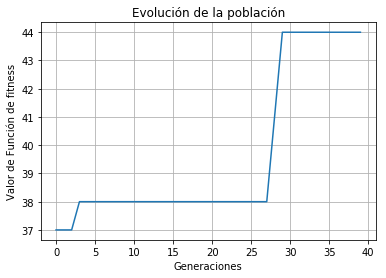

In [4]:
Pop = np.random.choice([0, 1], size=(population,var), p=[1./2, 1./2]) #Random binary values

####If a feasible initial population is wished, please, uncomment this#########################
"""for j in range(population):
    while True:
        aux = np.random.choice([0, 1], size=(1,var), p=[1./2, 1./2]) #Random binary values
        if F2(aux) <= Wmax:
            Pop[j,:] = aux
            break"""
###############################################################################################    

X  = []
y  = []

for gen in range(N):
    #####Fitness evaluation#########################################
    Fitness = F1(Pop)
    
    BestIndividuos = np.argsort(-Fitness,axis=0)

    Pop = Pop[BestIndividuos.flatten()]
        
    Wheel = np.cumsum(Fitness[BestIndividuos.flatten()])/np.sum(Fitness[BestIndividuos.flatten()])
    Wheel = Wheel.reshape(len(Wheel),1)
    #################################################################
    
    #####Crossover:  Wheel - Multipoint################################
    for parent in range(int(Tc*population/2)):
        while True:
            P = np.random.rand(1)
            ParentSelected_1 = np.where(Wheel >= P)[0][0]
            if F2(Pop[ParentSelected_1]) <= Wmax:
                break
        while True:
            P = np.random.rand(1)
            ParentSelected_2 = np.where(Wheel >= P)[0][0]
            if F2(Pop[ParentSelected_2]) <= Wmax:
                break
        
        #Multi-point crossover
        Child_1 = np.hstack((np.array_split(Pop[ParentSelected_1],3)[0],
                             np.array_split(Pop[ParentSelected_2],3)[1],
                             np.array_split(Pop[ParentSelected_1],3)[2]))
        Child_2 = np.hstack((np.array_split(Pop[ParentSelected_2],3)[0],
                             np.array_split(Pop[ParentSelected_1],3)[1],
                             np.array_split(Pop[ParentSelected_2],3)[2]))
        #Add to population
        Pop = np.vstack((Pop,Child_1,Child_2))
    #################################################################
    
    #####Fitness evaluation 2#########################################
    Fitness = F1(Pop)
    
    BestIndividuos = np.argsort(-Fitness,axis=0)

    Pop = Pop[BestIndividuos.flatten()]
        
    Wheel = np.cumsum(Fitness[BestIndividuos.flatten()])/np.sum(Fitness[BestIndividuos.flatten()])
    Wheel = Wheel.reshape(len(Wheel),1)
    #################################################################
    
    ##### Mutation: Wheel - flip 1 bit ###############################
    for parent in range(int(Tm*population)):
        while True:
            P = np.random.rand(1)
            ParentSelected = np.where(Wheel >= P)[0][0]
            if F2(Pop[ParentSelected]) <= Wmax:
                break
        #print(randint(0,Pop.shape[1]-1))
        r=randint(0,Pop.shape[1]-1)
        Child = Pop[ParentSelected]
        #print(Child)
        Child[r]=1-Child[r]
        #Add to population
        #print(Child)
        
        Pop = np.vstack((Pop,Child))
    #################################################################
        
    #####Selection: Elitism (deleting non-feasible )#################
    deaths = []
    for j in range(Pop.shape[0]):
        if F2(Pop[j,:]) > Wmax:
            deaths.append(j)
            
    Pop = np.delete(Pop,deaths,axis=0)
    #print(deaths,Pop.shape)
    Fitness = F1(Pop)
    BestIndividuos = np.argsort(-Fitness,axis=0)
    Pop = Pop[BestIndividuos.flatten()[:population]]
    #################################################################
    
    X.append(gen)
    y.append(F1(Pop[0])[0])
    print('Generación ', gen+1,', valor óptimo = ', F1(Pop[0])[0][0])
    print('elementos a llevar: ',list(Pop[0]))
plt.plot(X,y)
plt.title('Evolución de la población')
plt.xlabel('Generaciones')
plt.ylabel('Valor de Función de fitness')
plt.grid()
    
plt.show()

In [5]:
print('Generación ', gen+1,', valor óptimo = ', F1(Pop[0])[0][0],', con un peso de ', F2(Pop[0])[0][0])
print('elementos a llevar: ',list(Pop[0]))

Generación  40 , valor óptimo =  44 , con un peso de  29
elementos a llevar:  [0, 1, 1, 1, 1, 1, 1, 0, 1, 0]


In [6]:
print('Capacidad: ', Wmax)
print('Valor óptimo: ', F1(Pop[0])[0][0])
print('con un peso de: ', F2(Pop[0])[0][0])
data = {'beneficios':list(b.T),'pesos':list(w.T),'variables':Pop[0]}
df = pd.DataFrame(data)
df

Capacidad:  31.799999999999997
Valor óptimo:  44
con un peso de:  29


,beneficios,pesos,variables
0,[2],[7],0
1,[2],[1],1
2,[8],[6],1
3,[8],[7],1
4,[8],[5],1
5,[3],[3],1
6,[8],[3],1
7,[4],[9],0
8,[7],[4],1
9,[2],[8],0
